# Battle of Neighborhoods

## 1. Introduction

### 1.1 Background

New York is a major central city for diversity since many people from different cultural atmospheres have brought their families and dreams to New York City. The city has consistently seen people from around the world move to the city and call it home. It has been a center for trade and economic growth. It is the most populous city in the United States with an estimated 2019 population of 8,336,817. New York is known world wide as a cultural melting pot. While other states have had immigration surges, none have compared to the diversity and sheer number of immigrants that have made their way to the City. So these number of varies cultures combined to create a great diversity for itself. Since People from all over the world tend to come up here, we can see some many of their cultural aspects Transport, Food, Clothing, and so on...


### 1.2 Problem

Since there are so many restaurants or cuisines in NewYork city, it is quite difficult to set up a restaurant and be successful. Several factors are to be considered before opening a restaurant in a particular area. Some of them are:

- Market Places
- Competitors in particular location
- Aiding places that make people come to restaurants like Gym, Entertaining Public places
- Population
- Demographics

And so on... 

The problem is to find the best neighborhood to open a Italian restaurant with low risk and high success rate and to explore competitors in that Neighborhood by applying exploratory data analysis.

### 1.3 Target Audience

Target Audience are the ones who want to open an Italian Cuisine restaurant and want to know about the many criteria that leads to come to a data driven conclusion for selecting the best neighborhood for opening one. But some of the criteria we are gonna be focusing on in our project is as follows,

- Best Neighborhood for opening Restaurant (Italian Cuisine) in New York.
- Area which lack Italian Restaurants.
- Neighborhoods with best Italian Cuisine.
- Boroughs with Potential Italian Restaurants.

This report can also help tourists and the people who recently shifted to Newyork who want to know which place is good for Italian restaurants to try in Newyork  

## 2. Data

Since we will be focusing on New York for opening our restaurant, we will be gathering the data for the same and the three main data we are gonna use are the New York Neighborhood data, data about the cuisines in New York and the Geo spacial data of boundaries of the Neighborhoods in New York.


#### 2.1 Data 1

New York Neighborhood Data which will be used to get to know about the various neighborhoods which are gonna take into consideration for our Project. This data is in json format and it is converted to dataframe using pandas library and performed analysis on the data using basic techniques. From the data, we found that there are 5 boroughs and 306 neighborhoods in NewYork 


Data source : https://cocl.us/new_york_dataset
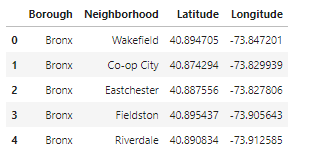

#### 2.2 Data 2

Geo-spacial data of the New York to get a better understanding of the neighborhoods in it and their corresponding locations in the Folium map would make certain things clear for the Project. This will be achieved using the acquired data and visualize the same using Choropleth maps. 
                  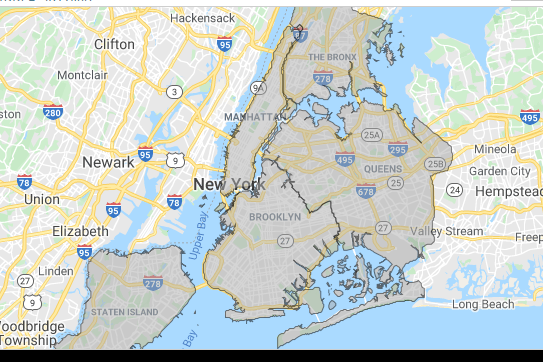
Data source : https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm
From the the link provided above, geojson file of NewYork boundaries is downloaded and used for visualizing boroughs with average rating through CHOROPLETH maps

#### 2.3 Data 3

Data from the Foursquare API is acquired to know about the various restaurants in each neighborhood of New York city especially Italian cuisine, which will be used for acquiring the information regarding same for all the venues of each neighborhood. In this data we consider only Italian restaurants by filtering venue categories. Using the foursquare API we can also get the specific venue details like ratings,tips and likes which are used for finding best restaurants in the neighborhood

Data source : Foursquare

## 3. Methodology

### 3.1 Exploratory Data Analysis

Import all relevant libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
%matplotlib inline

import folium    #For rendering maps
import json

import requests   #library to handle requests
from pandas.io.json import json_normalize   # tranform JSON file into a pandas dataframe

from geopy.geocoders import Nominatim


Import  NewYork Neighborhood data which is in json format to Pandas Dataframe 

In [2]:
with open('newyork_data.json') as json_data:
    data = json.load(json_data)  #load the json file
ny_data = data['features']
ny_data


[{'type': 'Feature',
  'id': 'nyu_2451_34572.1',
  'geometry': {'type': 'Point',
   'coordinates': [-73.84720052054902, 40.89470517661]},
  'geometry_name': 'geom',
  'properties': {'name': 'Wakefield',
   'stacked': 1,
   'annoline1': 'Wakefield',
   'annoline2': None,
   'annoline3': None,
   'annoangle': 0.0,
   'borough': 'Bronx',
   'bbox': [-73.84720052054902,
    40.89470517661,
    -73.84720052054902,
    40.89470517661]}},
 {'type': 'Feature',
  'id': 'nyu_2451_34572.2',
  'geometry': {'type': 'Point',
   'coordinates': [-73.82993910812398, 40.87429419303012]},
  'geometry_name': 'geom',
  'properties': {'name': 'Co-op City',
   'stacked': 2,
   'annoline1': 'Co-op',
   'annoline2': 'City',
   'annoline3': None,
   'annoangle': 0.0,
   'borough': 'Bronx',
   'bbox': [-73.82993910812398,
    40.87429419303012,
    -73.82993910812398,
    40.87429419303012]}},
 {'type': 'Feature',
  'id': 'nyu_2451_34572.3',
  'geometry': {'type': 'Point',
   'coordinates': [-73.82780644716412, 

In [3]:
#define column names
column_names=['Borough','Neighborhood','Latitude','Longitude']
#Instantiate the dataframe
ny_df=pd.DataFrame(columns=column_names)

#fill the rows of dataframe by looping
for data in ny_data:
    borough = data['properties']['borough']
    neighborhood = data['properties']['name']
    latlong = data['geometry']['coordinates']
    latitude = latlong[1]
    longitude = latlong[0]
    ny_df = ny_df.append({'Borough' : borough,'Neighborhood': neighborhood,'Latitude':latitude,'Longitude':longitude},ignore_index=True)
ny_df.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [4]:
print('There are {} boroughs and {} neghborhoods in NewYork'.format(ny_df['Borough'].nunique(),ny_df.shape[0]))

There are 5 boroughs and 306 neghborhoods in NewYork


In [12]:
ny_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       306 non-null    object 
 1   Neighborhood  306 non-null    object 
 2   Latitude      306 non-null    float64
 3   Longitude     306 non-null    float64
dtypes: float64(2), object(2)
memory usage: 9.7+ KB


Number of Neighborhoods in each borough

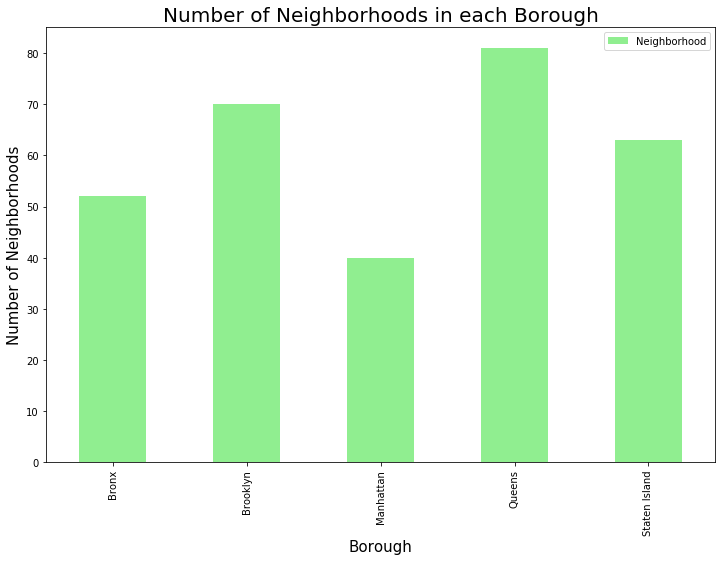

In [5]:
plt.figure(figsize=(12,8))
ny_df.groupby('Borough')['Neighborhood'].count().plot(kind='bar',color='lightgreen')
plt.title('Number of Neighborhoods in each Borough',fontsize=20)
plt.xlabel('Borough',fontsize=15)
plt.ylabel('Number of Neighborhoods',fontsize=15)
plt.legend()

plt.show()

Define a function to get latitude and longitude of a given address

In [6]:
def location(address):
    location = Nominatim(user_agent='ny_explorer').geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude
lat,lng=location('New York City,NY')
print('Geographical coordinates of NewYork are {},{}'.format(lat,lng))

Geographical coordinates of NewYork are 40.7127281,-74.0060152


Define a function to retrieve all the venues and details of venues in neighborhoods of Newyork

In [43]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    CLIENT_ID = '5PW2QHZ2UPWOF0EA10APBKSVUPDTIRTCFYFOPXY5FLHUY5Q4' # your Foursquare ID
    CLIENT_SECRET = 'GGG1E1ROZBVAS2L0MQT1TRE2QYMBYUXT1CUTAEWDRUVYGDJ1' # your Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION,
            lat,
            lng,
            radius,
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

def get_venue_details(venue_id):
        
    CLIENT_ID = '5PW2QHZ2UPWOF0EA10APBKSVUPDTIRTCFYFOPXY5FLHUY5Q4' # your Foursquare ID
    CLIENT_SECRET = 'GGG1E1ROZBVAS2L0MQT1TRE2QYMBYUXT1CUTAEWDRUVYGDJ1' # your Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [18]:
f=get_venues(40.898273,-73.867315)
f[f['Category']=='Italian Restaurant']

,ID,Name,Category
1,511edb6de4b0d58346fd272d,Patrizia's Of Woodlawn,Italian Restaurant
24,4d3cb3026b3d236a066a6364,Rivers Edge,Italian Restaurant


Construct a dataframe of neighborhoods with only Italian Restaurants

In [23]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
italian_rest_ny=pd.DataFrame(columns=column_names)

print('Italian restaurants in\n---------------------')
       
for row in ny_df.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    italian_restaurants=venues[venues['Category']=='Italian Restaurant']
    if len(italian_restaurants) > 0:
        print(Neighborhood+', '+Borough+' : '+str(len(italian_restaurants)))   #print no. of italian rests in each neighborhood
    for restaurant_detail in italian_restaurants.values.tolist():
        id, name , category=restaurant_detail
        italian_rest_ny = italian_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)

print('Completed constructing the Italian cuisine restaurants data set')

Italian restaurants in
---------------------
Riverdale, Bronx : 1
Kingsbridge, Bronx : 1
Woodlawn, Bronx : 2
Baychester, Bronx : 2
Pelham Parkway, Bronx : 3
City Island, Bronx : 3
Fordham, Bronx : 9
Melrose, Bronx : 2
Mott Haven, Bronx : 1
Morrisania, Bronx : 1
Throgs Neck, Bronx : 6
Country Club, Bronx : 4
Westchester Square, Bronx : 1
Van Nest, Bronx : 3
Morris Park, Bronx : 6
Belmont, Bronx : 15
Spuyten Duyvil, Bronx : 2
North Riverdale, Bronx : 2
Pelham Bay, Bronx : 4
Schuylerville, Bronx : 4
Edgewater Park, Bronx : 6
Pelham Gardens, Bronx : 1
Concourse, Bronx : 1
Bay Ridge, Brooklyn : 6
Bensonhurst, Brooklyn : 4
Sunset Park, Brooklyn : 1
Greenpoint, Brooklyn : 2
Gravesend, Brooklyn : 1
Sheepshead Bay, Brooklyn : 5
Flatbush, Brooklyn : 1
Windsor Terrace, Brooklyn : 5
Williamsburg, Brooklyn : 1
Bushwick, Brooklyn : 2
Brooklyn Heights, Brooklyn : 4
Cobble Hill, Brooklyn : 5
Carroll Gardens, Brooklyn : 4
Gowanus, Brooklyn : 4
Fort Greene, Brooklyn : 5
Park Slope, Brooklyn : 1
Starrett

KeyError: 'groups'

In [24]:
italian_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Riverdale,55aaee4d498e3cbb70e625d6,Bella Notte Pizzeria
1,Bronx,Kingsbridge,55aaee4d498e3cbb70e625d6,Bella Notte Pizzeria
2,Bronx,Woodlawn,511edb6de4b0d58346fd272d,Patrizia's Of Woodlawn
3,Bronx,Woodlawn,4d3cb3026b3d236a066a6364,Rivers Edge
4,Bronx,Baychester,4c9518076b35a143d5dc21dc,Fratelli's


In [28]:
print('There are {} Italian restaurants in Neighborhoods of NewYork'.format(italian_rest_ny.shape[0]))

There are 297 Italian restaurants in Neighborhoods of NewYork


Visualize the number of restaurants which serves Italian cuisine for each and every borough in New York city.

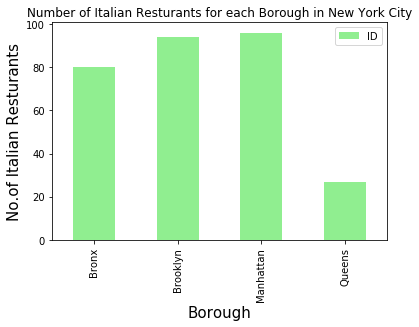

In [29]:
# title
plt.title('Number of Italian Resturants for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Italian Resturants', fontsize=15)
#giving a bar plot
italian_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar', color='lightgreen')
#legend
plt.legend()
#displays the plot
plt.show()

Above graph depicts that "Manhattan" has more number of restaurants of Italian cuisine

Visualize the same for Top 15 neighborhoods based on the number of Italian cuisine restaurants in New York city

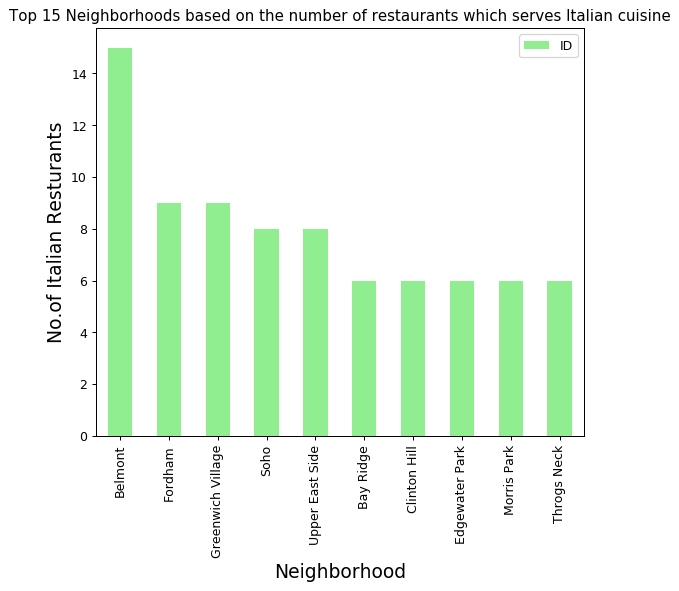

In [30]:
plt.figure(figsize=(7,6), dpi = 90)
# title
plt.title('Top 15 Neighborhoods based on the number of restaurants which serves Italian cuisine')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Italian Resturants', fontsize=15)
#giving a bar plot
italian_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(10).plot(kind='bar', color='lightgreen')
#legend
plt.legend()
#displays the plot
plt.show()

The above graph depicts that "Belmont" has more number of Italian restaurants

In [31]:
italian_rest_ny[italian_rest_ny['Neighborhood']=='Belmont']

,Borough,Neighborhood,ID,Name
45,Bronx,Belmont,4acf80aef964a52025d420e3,Tino's Delicatessen
46,Bronx,Belmont,4bb6470cef159c7465b275f7,Calabria Pork Store
47,Bronx,Belmont,4af0fa29f964a52060e021e3,Antonio's Trattoria
48,Bronx,Belmont,4a8e261cf964a5201c1220e3,Roberto's
49,Bronx,Belmont,4af71916f964a520cf0522e3,Michaelangelo's Coal Fired Brick Oven Pizza Re...
50,Bronx,Belmont,4b5a4c8ff964a52049bb28e3,Emilia's Restaurant
51,Bronx,Belmont,59050f51b23dfa5f6649e678,Arthur Avenue Fiasco
52,Bronx,Belmont,4aa425bef964a5208e4520e3,Dominick's Restaurant
53,Bronx,Belmont,4c79d294278eb713f6a05580,Cafe al Mercato
54,Bronx,Belmont,4bc22a22920eb713bcc51b2c,Tra Di Noi


In [44]:
# Construct a dataframe that contains Italian restaurant details in neighborhoods of NewYork
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
italian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in italian_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(italian_rest_ny),')','processed')
    italian_rest_stats_ny = italian_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID                  Name  Likes  Rating  Tips
0  55aaee4d498e3cbb70e625d6  Bella Notte Pizzeria      9     6.8     4
( 1 / 297 ) processed
                         ID                  Name  Likes  Rating  Tips
0  55aaee4d498e3cbb70e625d6  Bella Notte Pizzeria      9     6.8     4
( 2 / 297 ) processed
                         ID                    Name  Likes  Rating  Tips
0  511edb6de4b0d58346fd272d  Patrizia's Of Woodlawn     18     8.6    14
( 3 / 297 ) processed
                         ID         Name  Likes  Rating  Tips
0  4d3cb3026b3d236a066a6364  Rivers Edge     10     6.9     8
( 4 / 297 ) processed
                         ID        Name  Likes  Rating  Tips
0  4c9518076b35a143d5dc21dc  Fratelli's     22     8.7     6
( 5 / 297 ) processed
                         ID          Name  Likes  Rating  Tips
0  5411894d498e4a254a11a46c  Olive Garden     26     7.3     8
( 6 / 297 ) processed
                         ID    Name  Likes  Rating  Tips
0  4bf96a

KeyError: 'venue'

In [45]:
italian_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Riverdale,55aaee4d498e3cbb70e625d6,Bella Notte Pizzeria,9,6.8,4
1,Bronx,Kingsbridge,55aaee4d498e3cbb70e625d6,Bella Notte Pizzeria,9,6.8,4
2,Bronx,Woodlawn,511edb6de4b0d58346fd272d,Patrizia's Of Woodlawn,18,8.6,14
3,Bronx,Woodlawn,4d3cb3026b3d236a066a6364,Rivers Edge,10,6.9,8
4,Bronx,Baychester,4c9518076b35a143d5dc21dc,Fratelli's,22,8.7,6


In [46]:
italian_rest_stats_ny.shape

(276, 7)

In [47]:
italian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       276 non-null    object 
 1   Neighborhood  276 non-null    object 
 2   ID            276 non-null    object 
 3   Name          276 non-null    object 
 4   Likes         276 non-null    object 
 5   Rating        276 non-null    float64
 6   Tips          276 non-null    object 
dtypes: float64(1), object(6)
memory usage: 15.2+ KB


In [49]:
convert_types={'Likes':float,'Tips':'float'}
italian_rest_stats_ny=italian_rest_stats_ny.astype(convert_types)
italian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       276 non-null    object 
 1   Neighborhood  276 non-null    object 
 2   ID            276 non-null    object 
 3   Name          276 non-null    object 
 4   Likes         276 non-null    float64
 5   Rating        276 non-null    float64
 6   Tips          276 non-null    float64
dtypes: float64(3), object(4)
memory usage: 15.2+ KB


Restaurant with highest rating

In [50]:
italian_rest_stats_ny.iloc[italian_rest_stats_ny['Rating'].idxmax()]

Borough                         Brooklyn
Neighborhood                    Bushwick
ID              5a98aed16a59506d7a60d67c
Name                          Carmenta’s
Likes                                 58
Rating                               9.4
Tips                                  21
Name: 106, dtype: object

Restaurant with maximum likes

In [51]:
italian_rest_stats_ny.iloc[italian_rest_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood           Greenwich Village
ID              4cc6222106c25481d7a4a047
Name                 Rubirosa Ristorante
Likes                               2492
Rating                               9.2
Tips                                 825
Name: 228, dtype: object

Restaurant that has more tips/reviews

In [52]:
italian_rest_stats_ny.iloc[italian_rest_stats_ny['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood           Greenwich Village
ID              4cc6222106c25481d7a4a047
Name                 Rubirosa Ristorante
Likes                               2492
Rating                               9.2
Tips                                 825
Name: 228, dtype: object

Create a dataframe that has the average rating of all Italian restaurants in the particular neighborhood of New York city

In [62]:
ny_neighborhood_stats=italian_rest_stats_ny.groupby('Neighborhood',as_index=False).mean().sort_values(by='Rating',ascending=False)[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats

,Neighborhood,Average Rating
21,Downtown,9.200000
8,Boerum Hill,9.200000
12,Central Harlem,9.100000
10,Bushwick,9.050000
36,Greenpoint,9.050000
37,Greenwich Village,8.988889
30,Fort Greene,8.920000
68,Soho,8.912500
40,Jackson Heights,8.900000
44,Little Italy,8.900000


Create a dataframe that has the average rating of all Italian restaurants in the particular Borough of New York city

In [63]:
ny_borough_stats=italian_rest_stats_ny.groupby('Borough',as_index=False).mean().sort_values(by='Rating',ascending=False)[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats

,Borough,Average Rating
2,Manhattan,8.634375
1,Brooklyn,8.007447
3,Queens,7.983333
0,Bronx,7.200000


Visualizations of number of restaurants with average rating in Borough

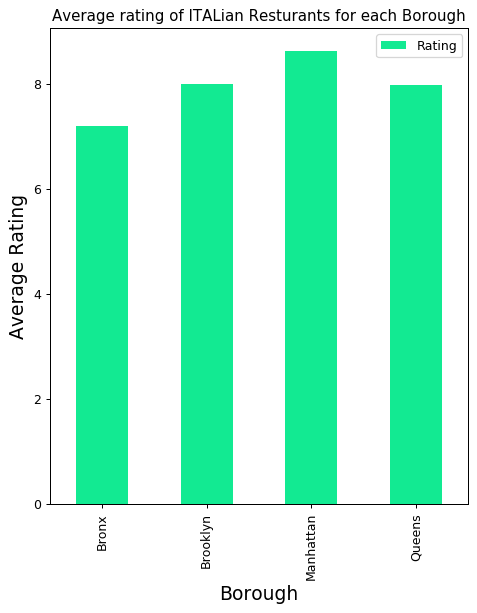

In [65]:
plt.figure(figsize=(6,7), dpi = 90)
# title
plt.title('Average rating of ITALian Resturants for each Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
italian_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar', color='#12EA92')
#legend
plt.legend()
#displays the plot
plt.show()

In [67]:
#Create a dataframe of neighborhoods with average rating >=9 
ny_neighborhood_avg_rating=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=9.0]
ny_neighborhood_avg_rating

,Neighborhood,Average Rating
21,Downtown,9.20
8,Boerum Hill,9.20
12,Central Harlem,9.10
10,Bushwick,9.05
36,Greenpoint,9.05


In [70]:
ny_neighborhood=pd.merge(ny_df,ny_neighborhood_avg_rating,on='Neighborhood')
ny_neighborhood

,Borough,Neighborhood,Latitude,Longitude,Average Rating
2,Brooklyn,Downtown,40.690844,-73.983463,9.20
3,Brooklyn,Boerum Hill,40.685683,-73.983748,9.20
4,Manhattan,Central Harlem,40.815976,-73.943211,9.10
0,Brooklyn,Greenpoint,40.730201,-73.954241,9.05
1,Brooklyn,Bushwick,40.698116,-73.925258,9.05


In [75]:
ny_map=folium.Map(location=location('New York City,NY'),zoom_start=12)

for lat,lng,borough,neighborhood in zip(ny_neighborhood['Latitude'],ny_neighborhood['Longitude'],ny_neighborhood['Borough'],ny_neighborhood['Neighborhood']):
    label=folium.Popup(Neighborhood,borough)
    folium.CircleMarker([lat,lng],radius=5,color='red',fill=True,fill_color='red',fill_opacity=0.7,popup=label).add_to(ny_map)
ny_map

## 4. Results

Based on the Data Analysis and Visualization using Folium and Matplotlib we have rendered various bar charts and two maps from which we can come to a better understanding of the interests we had earlier to be discovered which are specified as follows.

1.	Out of 5 boroughs in NewYork, Queens and Brooklyn boroughs has highest number of neighborhoods and Manhattan has the least
2.	Out of 295 Italian restaurants in neighborhoods of NewYork,  Manhattan has highest number of restaurants despite having the ...minimum neighborhoods compared to other boroughs
3.	Among  neighborhoods, Belmont(borough-Bronx)  has more number of restaurants of Italian cuisine
4.	“Rubirosa Ristorante”which is in Manhattan is more liked and has more number of tips
5.	Top 5 neighborhoods with restaurants of average rating more than 9  are Downtown,Boerum Hill,Central Harlem and Greenpoint
6.	Manhattan has the highest average rating of 8.6 among boroughs
7.	Area with less Italian  restaurants is Queens and has average rating around 8
8.	In Top 5 neighborhoods  of average rating >9, 4 neighborhoods belong to  borough “Brooklyn” which means brooklyn has highly rated restaurants of Italian cuisine in NewYork 


## 5. Discussion

Since the problem of this project is to find best location to open  Italian restaurant, some of the suggestions can be made to the target audience which are as follows:
- Menu and tip can be taken from top rated restaurants before opening a restaurant
- Manhattan  and Brooklyn has highly rated restaurants which means more number of customers are in that area who likes ...Italian cuisine. So the restaurant can be opened here but the investor has competitor risk. This can be reduced by doing ...competitor analysis which means by findiing out the factors that the competitors draw customers. This can be an extension to ...this project
- If the investor want less competitor risk and high successful rate, Queens is the best area to open Italian restaurant as ...there are few restaurants when compared to other boroughs and has average rating of 8.


## 6. Conclusion

In this project, we have gone through the process of identifying the business problem, specifying the data required, extracting and preparing the data, performing exploratory data analysis and providing recommendation to the target audience